In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# link to parquet file can be found here: https://drive.google.com/drive/u/4/folders/1sO-VrUDI7yTd9s5r4WU9LXjrIKL2pfEl

# 1. Overview

[Link of Flight Dataset](https://www.kaggle.com/datasets/usdot/flight-delays?resource=download&select=flights.csv)

- This exercise will be carried out using the [Python](https://www.python.org/) programming language and will rely hevily on the [Pandas](https://pandas.pydata.org/) library for data manipulation.
- % of Cancelled flights by Airline
- % of cancelled by Origin_aiports
- % of Security_delay by Origin_airports
- % of Airline_delay by Airline
- % of Weather_delay by origin_airports
- % of Weather_delay by Airline

> ⚠ **Ensure that your Python version is 3.9 or higher**

In [4]:
df = pd.read_parquet("flight_data_clean.parquet")
df.head()

,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,...,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,DELAYED_TIME,DELAYED,AIRLINE,ORIGIN_AIRPORT,ORIGIN_STATE,DESTINATION_AIRPORT,DESTINATION_STATE
0,Thursday,98,0005,-11.0,205.0,194.0,1448,0430,-22.0,0,...,NaN,NaN,2015-01-01,11.0,0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,AK,Seattle-Tacoma International Airport,WA
1,Thursday,108,0045,-4.0,204.0,194.0,1448,0509,-14.0,0,...,NaN,NaN,2015-01-01,10.0,0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,AK,Seattle-Tacoma International Airport,WA
2,Thursday,136,0135,NaN,205.0,NaN,1448,0600,NaN,0,...,NaN,NaN,2015-01-01,NaN,0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,AK,Seattle-Tacoma International Airport,WA
3,Thursday,134,0155,-15.0,218.0,198.0,1448,0633,-35.0,0,...,NaN,NaN,2015-01-01,20.0,0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,AK,Seattle-Tacoma International Airport,WA
4,Thursday,114,0220,-11.0,200.0,199.0,1448,0640,-12.0,0,...,NaN,NaN,2015-01-01,1.0,0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,AK,Seattle-Tacoma International Airport,WA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332908 entries, 0 to 5332907
Data columns (total 25 columns):
 #   Column               Dtype         
---  ------               -----         
 0   DAY_OF_WEEK          object        
 1   FLIGHT_NUMBER        int64         
 2   SCHEDULED_DEPARTURE  object        
 3   DEPARTURE_DELAY      float64       
 4   SCHEDULED_TIME       float64       
 5   ELAPSED_TIME         float64       
 6   DISTANCE             int64         
 7   SCHEDULED_ARRIVAL    object        
 8   ARRIVAL_DELAY        float64       
 9   DIVERTED             int64         
 10  CANCELLED            int64         
 11  CANCELLATION_REASON  object        
 12  AIR_SYSTEM_DELAY     float64       
 13  SECURITY_DELAY       float64       
 14  AIRLINE_DELAY        float64       
 15  LATE_AIRCRAFT_DELAY  float64       
 16  WEATHER_DELAY        float64       
 17  DATE                 datetime64[ns]
 18  DELAYED_TIME         float64       
 19  DELAYED              

# 2. Queries
- **% of cancelled by Origin_aiports**
- **% of Cancelled flights by Airline**
- **% of Security_delay by Origin_airports**
- **% of Airline Delays by Airlines**
- **% of Flights Dealyed by Weather by Origin Airport**
- **% of Flights Dealyed by Weather by Airline**
- **% of Flights Dealyed by Weather by State**

### 2.1 % of Cancelled Flights by Origin Airport

In [5]:
#Total number of unique Airports
df['ORIGIN_AIRPORT'].nunique()

322

In [104]:
#Total Number of flight taken from origin airport
airport_count = df['ORIGIN_AIRPORT'].value_counts().reset_index().\
                rename(columns={'index': 'ORIGIN_AIRPORT', 'ORIGIN_AIRPORT': 'Flight_Count'})
airport_count.head(10)

,ORIGIN_AIRPORT,Flight_Count
0,Hartsfield-Jackson Atlanta International Airport,346836
1,Chicago O'Hare International Airport,285883
2,Dallas/Fort Worth International Airport,239551
3,Denver International Airport,196054
4,Los Angeles International Airport,194673
5,San Francisco International Airport,148008
6,Phoenix Sky Harbor International Airport,146815
7,George Bush Intercontinental Airport,146622
8,McCarran International Airport,133181
9,Minneapolis-Saint Paul International Airport,112117


In [8]:
#Total number of cancelled flights from origin airport
canc = df.groupby('ORIGIN_AIRPORT')['CANCELLED'].sum().sort_values(ascending=False).\
       reset_index().rename(columns={'index':'ORIGIN_AIRPORT','CANCELLED':'Cancelled'})
canc.head(10)

,ORIGIN_AIRPORT,Cancelled
0,Chicago O'Hare International Airport,8547
1,Dallas/Fort Worth International Airport,6254
2,LaGuardia Airport (Marine Air Terminal),4531
3,Newark Liberty International Airport,3110
4,Gen. Edward Lawrence Logan International Airport,2654
5,Hartsfield-Jackson Atlanta International Airport,2557
6,Los Angeles International Airport,2164
7,San Francisco International Airport,2148
8,George Bush Intercontinental Airport,2130
9,Denver International Airport,2122


In [9]:
cn_df = pd.merge(canc,airport_count, on='ORIGIN_AIRPORT')
cn_df.head(10)

,ORIGIN_AIRPORT,Cancelled,Flight_Count
0,Chicago O'Hare International Airport,8547,285883
1,Dallas/Fort Worth International Airport,6254,239551
2,LaGuardia Airport (Marine Air Terminal),4531,99605
3,Newark Liberty International Airport,3110,101772
4,Gen. Edward Lawrence Logan International Airport,2654,107847
5,Hartsfield-Jackson Atlanta International Airport,2557,346836
6,Los Angeles International Airport,2164,194673
7,San Francisco International Airport,2148,148008
8,George Bush Intercontinental Airport,2130,146622
9,Denver International Airport,2122,196054


In [81]:
cn_df['Percentage_of_cancelled_flights'] = cn_df['Cancelled']/cn_df['Flight_Count']*100
cn_df = cn_df.sort_values(by='Percentage_of_cancelled_flights', ascending=False).reset_index(drop=True)
cn_df.head()

,ORIGIN_AIRPORT,Cancelled,Flight_Count,Percentage_of_cancelled_flighs,Percentage_of_cancelled_flights
0,Ithaca Tompkins Regional Airport,4,34,11.764706,11.764706
1,Mammoth Yosemite Airport,16,156,10.256410,10.256410
2,Friedman Memorial Airport,88,956,9.205021,9.205021
3,Devils Lake Regional Airport,46,525,8.761905,8.761905
4,Del Norte County Airport (Jack McNamara Field),16,190,8.421053,8.421053


(-0.5, 9.5)

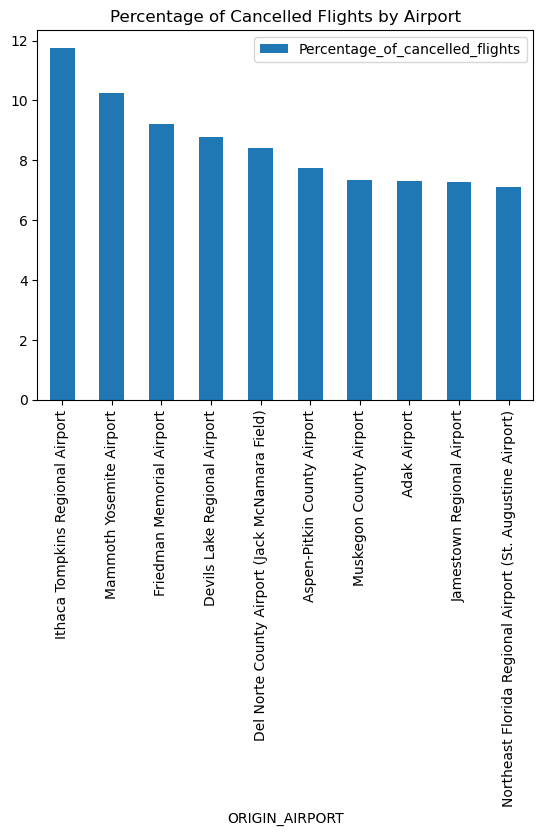

In [124]:
cn_df2 = cn_df.loc[0:9,:]
cn_df2.plot(x='ORIGIN_AIRPORT', y='Percentage_of_cancelled_flights', kind='bar',
            title='Percentage of Cancelled Flights by Airport')
plt.xlim([-0.5,9.5])

### 2.2 % of cancelled flights by Airline

In [11]:
#Total numner of unique Airline
df['AIRLINE'].nunique()

14

In [102]:
#Total number of flights for a unique airlines 
airline_count = df['AIRLINE'].value_counts().sort_values(ascending=False).reset_index().\
                rename(columns={'index':'AIRLINE','AIRLINE':'FLIGHT_COUNT'})
airline_count

,AIRLINE,FLIGHT_COUNT
0,Southwest Airlines Co.,1157339
1,Delta Air Lines Inc.,800329
2,American Airlines Inc.,648694
3,Skywest Airlines Inc.,539545
4,Atlantic Southeast Airlines,526249
5,United Air Lines Inc.,469829
6,American Eagle Airlines Inc.,272650
7,JetBlue Airways,245135
8,US Airways Inc.,198715
9,Alaska Airlines Inc.,158054


In [13]:
#Total number of cancelled flights for each airline
ar_cnc = df.groupby('AIRLINE')['CANCELLED'].sum().sort_values(ascending=False).reset_index()
ar_cnc

,AIRLINE,CANCELLED
0,Southwest Airlines Co.,15721
1,Atlantic Southeast Airlines,14754
2,American Eagle Airlines Inc.,14752
3,American Airlines Inc.,10194
4,Skywest Airlines Inc.,9719
5,United Air Lines Inc.,6445
6,JetBlue Airways,4146
7,US Airways Inc.,4067
8,Delta Air Lines Inc.,3807
9,Spirit Air Lines,1938


In [79]:
ar_df = pd.merge(airline_count,ar_cnc,on='AIRLINE')
ar_df['Percentage_of_cancelled_flights'] = ar_df['CANCELLED']/ar_df['FLIGHT_COUNT']*100
ar_df = ar_df.sort_values(by='Percentage_of_cancelled_flights', ascending=False).reset_index(drop=True)
ar_df

,AIRLINE,FLIGHT_COUNT,CANCELLED,Percentage_of_cancelled_flights
0,American Eagle Airlines Inc.,272650,14752,5.410600
1,Atlantic Southeast Airlines,526249,14754,2.803616
2,US Airways Inc.,198715,4067,2.046650
3,Spirit Air Lines,107165,1938,1.808426
4,Skywest Airlines Inc.,539545,9719,1.801333
5,JetBlue Airways,245135,4146,1.691313
6,American Airlines Inc.,648694,10194,1.571465
7,United Air Lines Inc.,469829,6445,1.371776
8,Southwest Airlines Co.,1157339,15721,1.358375
9,Virgin America,56439,511,0.905402


(-0.5, 10.5)

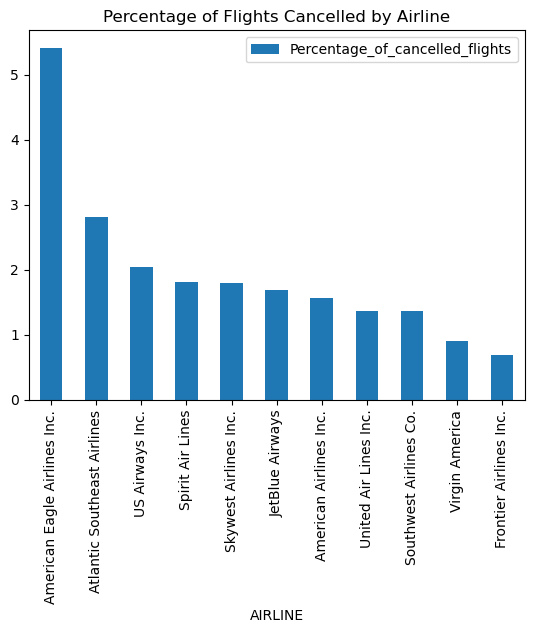

In [99]:
ar_df2 = ar_df.loc[0:10,:]
ar_df2.plot(x='AIRLINE', y='Percentage_of_cancelled_flights', kind='bar',
            title='Percentage of Flights Cancelled by Airline')
plt.xlim([-0.5,10.5])

### 2.3 % of Security_delay by Origin_airports

In [107]:
df_sd =df.groupby('ORIGIN_AIRPORT')['SECURITY_DELAY'].apply(lambda x: (x > 0).sum()).sort_values(ascending=False).\
       reset_index().rename(columns={'index':'ORIGIN_AIRPORT','SECURITY_DELAY':'Delay'})
df_sd.head()

,ORIGIN_AIRPORT,Delay
0,Phoenix Sky Harbor International Airport,341
1,Charlotte Douglas International Airport,286
2,Dallas/Fort Worth International Airport,241
3,John F. Kennedy International Airport (New Yor...,180
4,Chicago O'Hare International Airport,136


In [109]:
# Percentage of delayed flights due to security
sd =pd.merge(airport_count,df_sd,on='ORIGIN_AIRPORT')
sd['Percentage_of_delayed_flights'] = sd['Delay']/sd['Flight_Count']*100
df_sd = sd.sort_values(by='Percentage_of_delayed_flights', ascending=False).reset_index(drop=True)
df_sd.head()

,ORIGIN_AIRPORT,Flight_Count,Delay,Percentage_of_delayed_flights
0,Adak Airport,96,28,29.166667
1,Gustavus Airport,77,9,11.688312
2,Dillingham Airport,77,2,2.597403
3,Nome Airport,663,17,2.564103
4,Merle K. (Mudhole) Smith Airport,662,15,2.265861


(-0.5, 10.5)

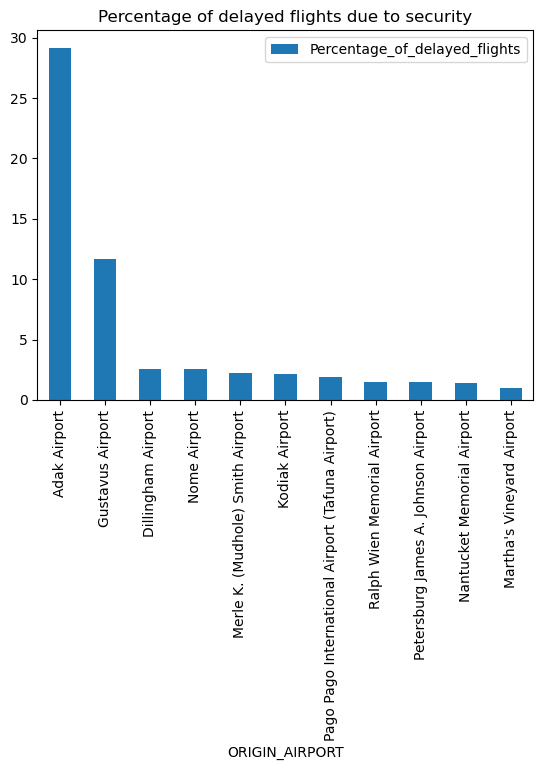

In [110]:
df_sd2 = df_sd.loc[0:10,:]
df_sd2.plot(x='ORIGIN_AIRPORT', y='Percentage_of_delayed_flights', kind='bar',
            title='Percentage of delayed flights due to security')
plt.xlim([-0.5,10.5])

### 2.4 % of Airline Delays by Airlines

In [20]:
# Counts of airline delayed flights
df_ar =df.groupby('AIRLINE')['AIRLINE_DELAY'].apply(lambda x: (x > 0).sum()).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'AIRLINE','AIRLINE_DELAY':'Delay'})
df_ar

,AIRLINE,Delay
0,Southwest Airlines Co.,137339
1,American Airlines Inc.,63164
2,United Air Lines Inc.,62570
3,Delta Air Lines Inc.,59666
4,Atlantic Southeast Airlines,50666
5,Skywest Airlines Inc.,36660
6,JetBlue Airways,35875
7,American Eagle Airlines Inc.,26079
8,US Airways Inc.,19717
9,Spirit Air Lines,17104


In [21]:
airline_count.head(5)

,AIRLINE,FLIGHT_COUNT
0,Southwest Airlines Co.,1157339
1,Delta Air Lines Inc.,800329
2,American Airlines Inc.,648694
3,Skywest Airlines Inc.,539545
4,Atlantic Southeast Airlines,526249


In [111]:
arrd = pd.merge(airline_count,df_ar,on='AIRLINE')
arrd['Percentage_of_delayed_flights'] = arrd['Delay']/arrd['FLIGHT_COUNT']*100
arrd = arrd.sort_values(by = 'Percentage_of_delayed_flights', ascending=False).reset_index(drop=True)
arrd

,AIRLINE,FLIGHT_COUNT,Delay,Percentage_of_delayed_flights
0,Spirit Air Lines,107165,17104,15.960435
1,JetBlue Airways,245135,35875,14.634793
2,United Air Lines Inc.,469829,62570,13.317611
3,Frontier Airlines Inc.,82735,10929,13.209645
4,Southwest Airlines Co.,1157339,137339,11.866791
5,US Airways Inc.,198715,19717,9.922250
6,Hawaiian Airlines Inc.,70030,6914,9.872912
7,American Airlines Inc.,648694,63164,9.737103
8,Atlantic Southeast Airlines,526249,50666,9.627762
9,American Eagle Airlines Inc.,272650,26079,9.565010


(-0.5, 10.5)

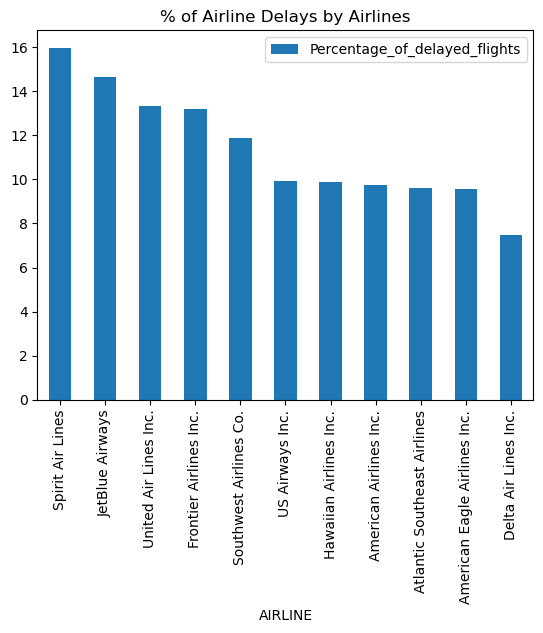

In [112]:
arrd2 = arrd.loc[0:10,:]
arrd2.plot(x='AIRLINE', y='Percentage_of_delayed_flights', kind='bar',
           title='% of Airline Delays by Airlines')
plt.xlim([-0.5,10.5])

### 2.5 % of Flight Delayed by Weather by Origin Airport

In [24]:
# Count of delayed flights by weather
wt_df = df.groupby('ORIGIN_AIRPORT')['WEATHER_DELAY'].apply(lambda x: (x > 0).sum()).sort_values(ascending=False).\
        to_frame().reset_index().rename(columns={'index':'ORIGIN_AIRPORT','WEATHER_DELAY':'Delay'})
wt_df.head()

,ORIGIN_AIRPORT,Delay
0,Chicago O'Hare International Airport,9317
1,Hartsfield-Jackson Atlanta International Airport,6864
2,Dallas/Fort Worth International Airport,5678
3,Denver International Airport,2545
4,Orlando International Airport,2197


In [113]:
# Percentage of cancelled flights by weather delay
mwt_df = pd.merge(airport_count,wt_df,on='ORIGIN_AIRPORT')
mwt_df['Percentage_of_delayed_flights'] = mwt_df['Delay']/mwt_df['Flight_Count']*100
mwt_df = mwt_df.sort_values(by = 'Percentage_of_delayed_flights', ascending=False).reset_index(drop=True)
mwt_df.head()

,ORIGIN_AIRPORT,Flight_Count,Delay,Percentage_of_delayed_flights
0,Wilmington Airport,100,5,5.000000
1,Yellowstone Regional Airport,665,31,4.661654
2,Ralph Wien Memorial Airport,663,24,3.619910
3,Yampa Valley Airport (Yampa Valley Regional),703,23,3.271693
4,Chicago O'Hare International Airport,285883,9317,3.259026


(-0.5, 10.5)

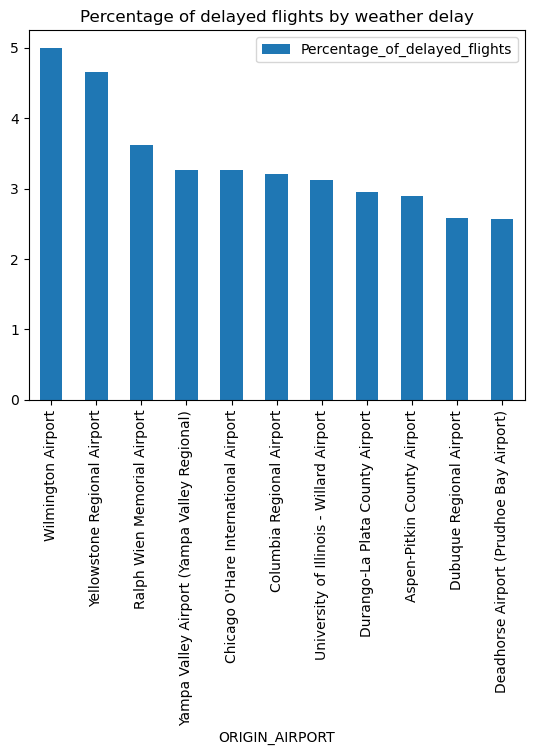

In [114]:
mwt_df2 = mwt_df.loc[0:10,:]
mwt_df2.plot(x='ORIGIN_AIRPORT', y='Percentage_of_delayed_flights',
             title='Percentage of delayed flights by weather delay', kind='bar')
plt.xlim([-0.5,10.5])

### 2.6 % of Flights Dealyed by Weather by Airline

In [26]:
df.head(5)

,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,...,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,DELAYED_TIME,DELAYED,AIRLINE,ORIGIN_AIRPORT,ORIGIN_STATE,DESTINATION_AIRPORT,DESTINATION_STATE
0,Thursday,98,0005,-11.0,205.0,194.0,1448,0430,-22.0,0,...,NaN,NaN,2015-01-01,11.0,0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,AK,Seattle-Tacoma International Airport,WA
1,Thursday,108,0045,-4.0,204.0,194.0,1448,0509,-14.0,0,...,NaN,NaN,2015-01-01,10.0,0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,AK,Seattle-Tacoma International Airport,WA
2,Thursday,136,0135,NaN,205.0,NaN,1448,0600,NaN,0,...,NaN,NaN,2015-01-01,NaN,0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,AK,Seattle-Tacoma International Airport,WA
3,Thursday,134,0155,-15.0,218.0,198.0,1448,0633,-35.0,0,...,NaN,NaN,2015-01-01,20.0,0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,AK,Seattle-Tacoma International Airport,WA
4,Thursday,114,0220,-11.0,200.0,199.0,1448,0640,-12.0,0,...,NaN,NaN,2015-01-01,1.0,0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,AK,Seattle-Tacoma International Airport,WA


In [27]:
dfx = df.groupby('AIRLINE')['WEATHER_DELAY'].apply(lambda x: (x > 0).sum()).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'AIRLINE','WEATHER_DELAY':'Delay'})
dfx

,AIRLINE,Delay
0,Delta Air Lines Inc.,11704
1,Southwest Airlines Co.,9611
2,American Airlines Inc.,9351
3,American Eagle Airlines Inc.,8893
4,United Air Lines Inc.,7331
5,Skywest Airlines Inc.,4294
6,Atlantic Southeast Airlines,2782
7,JetBlue Airways,2092
8,Virgin America,1976
9,US Airways Inc.,1722


In [28]:
# Percentage of delayed flights by airline on weather delay
dfx = pd.merge(airline_count,dfx,on='AIRLINE')
dfx

,AIRLINE,FLIGHT_COUNT,Delay
0,Southwest Airlines Co.,1157339,9611
1,Delta Air Lines Inc.,800329,11704
2,American Airlines Inc.,648694,9351
3,Skywest Airlines Inc.,539545,4294
4,Atlantic Southeast Airlines,526249,2782
5,United Air Lines Inc.,469829,7331
6,American Eagle Airlines Inc.,272650,8893
7,JetBlue Airways,245135,2092
8,US Airways Inc.,198715,1722
9,Alaska Airlines Inc.,158054,808


In [115]:
dfx['Percentage_of_delayed_flights'] = dfx['Delay']/dfx['FLIGHT_COUNT']*100
dfx = dfx.sort_values(by = 'Percentage_of_delayed_flights', ascending=False).reset_index(drop=True)
dfx

,AIRLINE,FLIGHT_COUNT,Delay,Percentage_of_cancelled_flights,Percentage_of_delayed_flights
0,Virgin America,56439,1976,3.501125,3.501125
1,American Eagle Airlines Inc.,272650,8893,3.261691,3.261691
2,United Air Lines Inc.,469829,7331,1.560355,1.560355
3,Delta Air Lines Inc.,800329,11704,1.462399,1.462399
4,American Airlines Inc.,648694,9351,1.441512,1.441512
5,US Airways Inc.,198715,1722,0.866568,0.866568
6,Spirit Air Lines,107165,921,0.859422,0.859422
7,JetBlue Airways,245135,2092,0.853407,0.853407
8,Southwest Airlines Co.,1157339,9611,0.830439,0.830439
9,Skywest Airlines Inc.,539545,4294,0.795856,0.795856


(-0.5, 10.5)

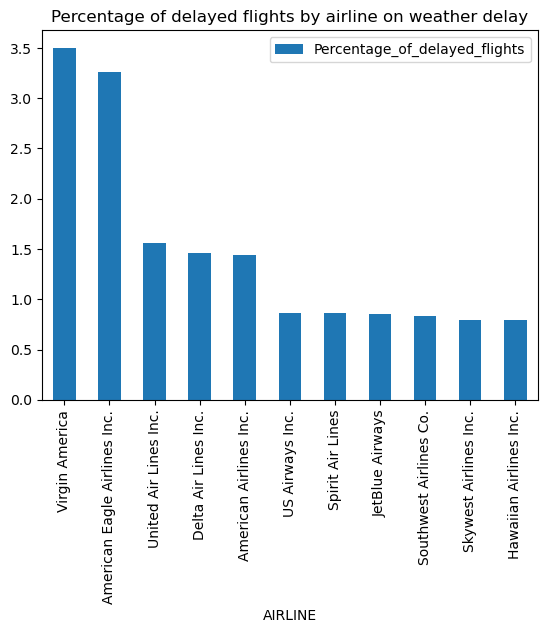

In [116]:
dfx2 = dfx.loc[0:10,:]
dfx2.plot(x='AIRLINE', y='Percentage_of_delayed_flights',
             title='Percentage of delayed flights by airline on weather delay', kind='bar')
plt.xlim([-0.5,10.5])

### 2.7 % of Flights Delayed by Weather by State

In [35]:
state_count = df['ORIGIN_STATE'].value_counts().sort_values(ascending=False).reset_index().\
                rename(columns={'index':'ORIGIN_STATE','ORIGIN_STATE':'FLIGHT_COUNT'})
state_count.head()

,ORIGIN_STATE,FLIGHT_COUNT
0,CA,647911
1,TX,631124
2,FL,415582
3,IL,381643
4,GA,360496


In [31]:
df_state = df.groupby('ORIGIN_STATE')['WEATHER_DELAY'].apply(lambda x: (x > 0).sum()).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'State','WEATHER_DELAY':'Delay'})
df_state.head()

,ORIGIN_STATE,Delay
0,IL,10630
1,TX,10113
2,GA,6932
3,FL,5797
4,NY,3440


In [36]:
df_state = pd.merge(state_count,df_state,on='ORIGIN_STATE')
df_state.head()

,ORIGIN_STATE,FLIGHT_COUNT,Delay
0,CA,647911,2948
1,TX,631124,10113
2,FL,415582,5797
3,IL,381643,10630
4,GA,360496,6932


In [117]:
df_state['Percentage_of_delayed_flights'] = df_state['Delay']/df_state['FLIGHT_COUNT']*100
df_state = df_state.sort_values(by = 'Percentage_of_delayed_flights', ascending=False).reset_index(drop=True)
df_state.head()

,ORIGIN_STATE,FLIGHT_COUNT,Delay,Percentage_of_cancelled_flights,Percentage_of_delayed_flights
0,DE,100,5,5.000000,5.000000
1,IL,381643,10630,2.785326,2.785326
2,GA,360496,6932,1.922906,1.922906
3,TX,631124,10113,1.602379,1.602379
4,IA,17382,278,1.599356,1.599356


(-0.5, 10.5)

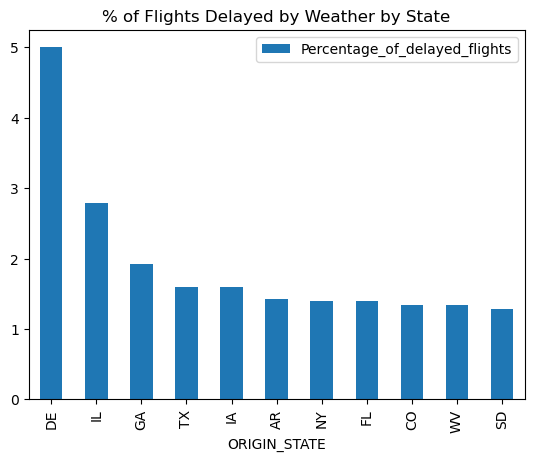

In [118]:
df_state2 = df_state.loc[0:10,:]
df_state2.plot(x='ORIGIN_STATE', y='Percentage_of_delayed_flights',
             title='% of Flights Delayed by Weather by State', kind='bar')
plt.xlim([-0.5,10.5])